### Plotting Data on NE30 Native Grid Using Previously Generated Mesh File<a id="top"></a>


This notebook shows how to plot NE30 (or NEX) native grids

Â© Software was developed by Charles Doutriaux. (April 2018)

## Table Of Contents

* [necessary modules for this notebook](#modules)
* [download necessary files](#download)
* [use e3sm_view to generate mesh file](#e3sm_view)
* [load data and apply grid](#data)
* [plot the data](#plot)

## Necessary Modules<a id="modules"></a>
[Back to Top](#top)

In [1]:
from __future__ import print_function
import e3sm_nex
import cdms2
import vcs
import requests
import numpy
from subprocess import Popen, PIPE
import shlex

## Download Data<a id="download"></a>
[Back to Top](#top)

In [2]:
def download(fnm):
    r = requests.get("https://cdat.llnl.gov/cdat/sample_data/%s" % fnm,stream=True)
    with open(fnm,"wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter local_filename keep-alive new chunks
                f.write(chunk)
                
for filename in ["ne30_TS.nc","ne30np4_latlon.091226.nc"]:
    download(filename)
    
    
data_path = "ne30_TS.nc"
grid_file_path = "ne30np4_latlon.091226.nc"

## Generate mesh file and grid via e3sm_view<a id="e3sm_view"></a>
[Back to Top](#top)

In [3]:
# Reads in data from grid file
gf = cdms2.open(grid_file_path)

#cmd line
cmd = "e3sm_view -i {} --grid {} --mesh {} -v TS --output_type=png".format(data_path, grid_file_path, "ne30_mesh.nc")

# execute
print("Running: ",cmd)
p = Popen(shlex.split(cmd),stdout=PIPE, stderr=PIPE)
p.communicate()

with cdms2.open("ne30_mesh.nc") as fmesh:
    m = fmesh("mesh")

grid = m.getGrid()

Running:  e3sm_view -i ne30_TS.nc --grid ne30np4_latlon.091226.nc --mesh ne30_mesh.nc -v TS --output_type=png


## Load Data and Apply Grid<a id="data"></a>
[Back to Top](#top)

In [4]:
# Load data and apply grid
fd = cdms2.open(data_path)
data = fd("TS")
# Need to clean up missing/bad values
data = e3sm_nex.applyGrid(data,grid)

## Plot<a id="plot"></a>
[Back to Top](#top)

/home/doutriaux1/anaconda2/envs/cdat_test/lib/python2.7/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


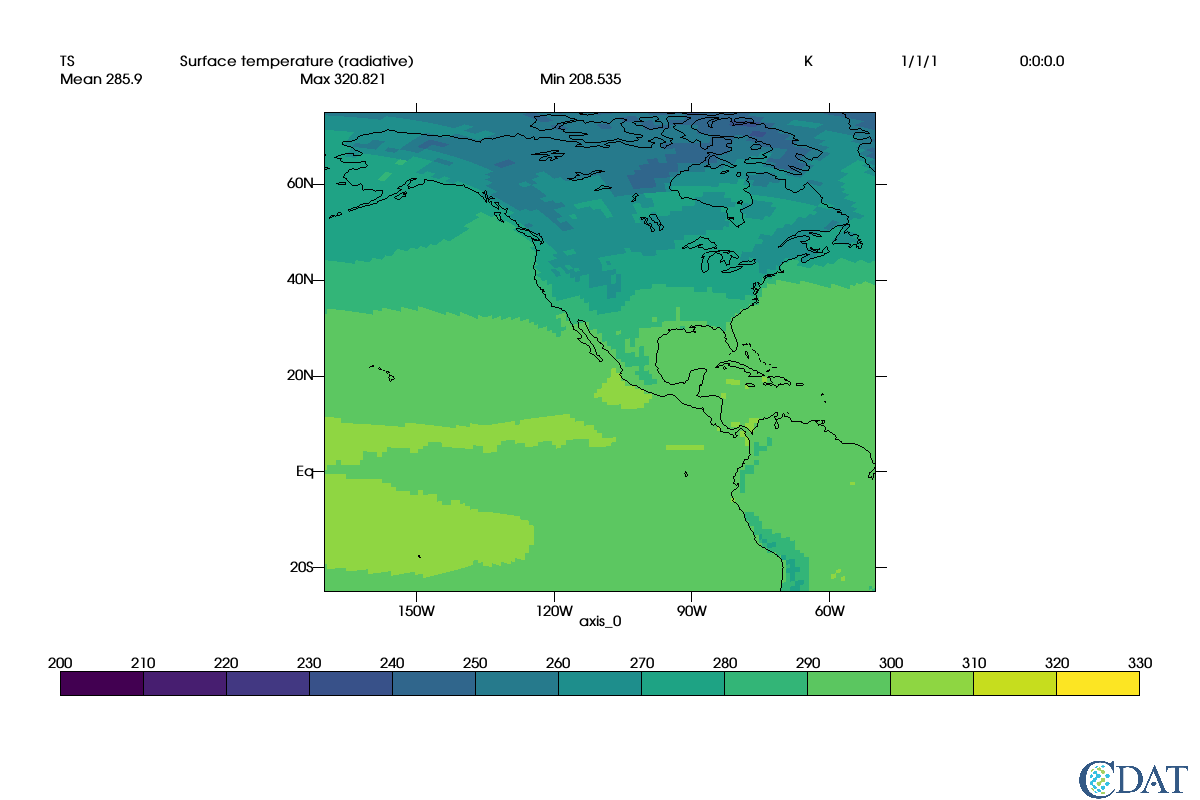

In [5]:
# plot
# create Canvas
x=vcs.init(bg=True, geometry=(1200,800))

# Create graphics method
mesh = vcs.createmeshfill()

# Only show a sub domain
mesh.datawc_x1 = -170
mesh.datawc_x2 = -50
mesh.datawc_y1 = -25
mesh.datawc_y2 = 75

# If you want to show mesh
# mesh.mesh = True

x.plot(data, mesh, ratio="autot")